<a href="https://colab.research.google.com/github/Frandiiile/Deep_tweets/blob/main/deep_tweets_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

## read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
training=pd.read_csv('data/training.csv')

In [3]:
train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


## Check null values

In [4]:
train.isnull().sum()

TweetId      0
Label        0
TweetText    0
dtype: int64

In [5]:
test.isnull().sum()

TweetId      0
TweetText    0
dtype: int64

In [6]:
train.shape

(6525, 3)

## Data cleaning

In [7]:
def clean_column(train):
    train['TweetText'] = train['TweetText'].str.replace('.', '')
    train['TweetText'] = train['TweetText'].str.replace('!', '')
    train['TweetText'] = train['TweetText'].str.replace('?', '')
    train['TweetText'] = train['TweetText'].str.replace('(', '')
    train['TweetText'] = train['TweetText'].str.replace(')', '')
    train['TweetText'] = train['TweetText'].str.replace('-', '')
clean_column(train)

<ipython-input-7-c6469047054e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['TweetText'] = train['TweetText'].str.replace('.', '')
<ipython-input-7-c6469047054e>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['TweetText'] = train['TweetText'].str.replace('?', '')
<ipython-input-7-c6469047054e>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['TweetText'] = train['TweetText'].str.replace('(', '')
<ipython-input-7-c6469047054e>:6: FutureWarning: The default value of regex will change from True to Fa

In [8]:
import re
def clean_Text(text):
    text=re.sub('@[A-Za-z0–9]+','',text) #Removing @mentions
    text=re.sub('#', '', text) # Removing '#' hash tag
    text=re.sub('RT[\s]+', '', text) # Removing RT
    text=re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text=re.sub(':', '', text)
    text=re.sub("'", '', text)
    text=re.sub(",", '', text)
    text=re.sub(";", '', text)
    text=re.sub("&", '', text)
    text=re.sub("``", '', text)
    text=re.sub('"', '', text)
    return text
train['TweetText']=train['TweetText'].apply(clean_Text)

In [9]:
train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,SecKerry The value of the and is measured no...
1,304834304222064640,Politics,1481 I fear so
2,303568995880144898,Sports,Watch video highlights of the wwc13 final betw...
3,304366580664528896,Sports,At Nitro Circus at AlbertPark theymakeitlook...
4,296770931098009601,Sports,Always a good thing Thanks for the feedback


In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Tokenization

In [11]:
def tolist(x):
    return x.split(' ')
train['TweetText']=train['TweetText'].apply(tolist)
train['TweetText'].astype(str)

0       ['SecKerry', 'The', 'value', 'of', 'the', '', ...
1                             ['1481', 'I', 'fear', 'so']
2       ['Watch', 'video', 'highlights', 'of', 'the', ...
3       ['', 'At', 'Nitro', 'Circus', 'at', 'AlbertPar...
4       ['', 'Always', 'a', 'good', 'thing', 'Thanks',...
                              ...                        
6520    ['Photo', 'PM', 'has', 'laid', 'a', 'wreath', ...
6521    ['The', 'secret', 'of', 'the', 'Chennai', 'pit...
6522        ['', 'he', 'isnt', 'on', 'Twitter', 'either']
6523    ['Which', 'England', 'player', 'would', 'you',...
6524    ['Dmitry', 'Medvedev', 'expressed', 'condolenc...
Name: TweetText, Length: 6525, dtype: object

In [12]:
#remove null strings
def remove_empty(x):
    return [item for item in x if item != '']
train['TweetText']=train['TweetText'].apply(remove_empty)

In [13]:
train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,"[SecKerry, The, value, of, the, and, is, measu..."
1,304834304222064640,Politics,"[1481, I, fear, so]"
2,303568995880144898,Sports,"[Watch, video, highlights, of, the, wwc13, fin..."
3,304366580664528896,Sports,"[At, Nitro, Circus, at, AlbertPark, theymakeit..."
4,296770931098009601,Sports,"[Always, a, good, thing, Thanks, for, the, fee..."


## lowercase all words in train

In [14]:
def lower_case(data):
    for i in range(data.shape[0]) :
        data['TweetText'][i] = [x.lower() for x in data['TweetText'][i]]
    return data
lower_case(train)

<ipython-input-14-defe20fe5eca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TweetText'][i] = [x.lower() for x in data['TweetText'][i]]


,TweetId,Label,TweetText
0,304271250237304833,Politics,"[seckerry, the, value, of, the, and, is, measu..."
1,304834304222064640,Politics,"[1481, i, fear, so]"
2,303568995880144898,Sports,"[watch, video, highlights, of, the, wwc13, fin..."
3,304366580664528896,Sports,"[at, nitro, circus, at, albertpark, theymakeit..."
4,296770931098009601,Sports,"[always, a, good, thing, thanks, for, the, fee..."
...,...,...,...
6520,296675082267410433,Politics,"[photo, pm, has, laid, a, wreath, at, martyrs,..."
6521,306677536195231746,Sports,"[the, secret, of, the, chennai, pitch, crumbli..."
6522,306451295307431937,Sports,"[he, isnt, on, twitter, either]"
6523,306088574221176832,Sports,"[which, england, player, would, you, take, out..."


## removing stop words

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
stop_words = ['amp','the','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
def remove_stopwords(data):
    for i in range(data.shape[0]) :
        for word in  stop_words:
            if word in data['TweetText'][i]:
                data['TweetText'][i].remove(word)
    return data
train = remove_stopwords(train)

## Lemmatization

In [17]:
#nltk dependencies
nltk.download('wordnet')
nltk.download()

[nltk_data] Downloading package wordnet to /root/nltk_data...


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> 
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
------------------------------------------------------------------

True

In [18]:
import nltk
nltk.data.path.append("/Users/aithassouneyouness/nltk_data")

In [19]:
wnl = nltk.WordNetLemmatizer()

def lemmatization(data):
    for i in range(data.shape[0]):
        lemmatized_tweet = []
        for word in data['TweetText'][i]:
            lemmatized_word = wnl.lemmatize(word)
            lemmatized_tweet.append(lemmatized_word)
        data['TweetText'][i] = lemmatized_tweet
    return data

train = lemmatization(train)

<ipython-input-19-da73a308088f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TweetText'][i] = lemmatized_tweet


In [20]:
train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,"[seckerry, value, measured, dollar, in, term, ..."
1,304834304222064640,Politics,"[1481, fear]"
2,303568995880144898,Sports,"[watch, video, highlight, wwc13, final, austra..."
3,304366580664528896,Sports,"[nitro, circus, at, albertpark, theymakeitlook..."
4,296770931098009601,Sports,"[always, good, thing, thanks, feedback]"


## Exploratory data analysis

### check if our data is balanced or not

In [21]:
train['Label'].value_counts()

Sports      3325
Politics    3200
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

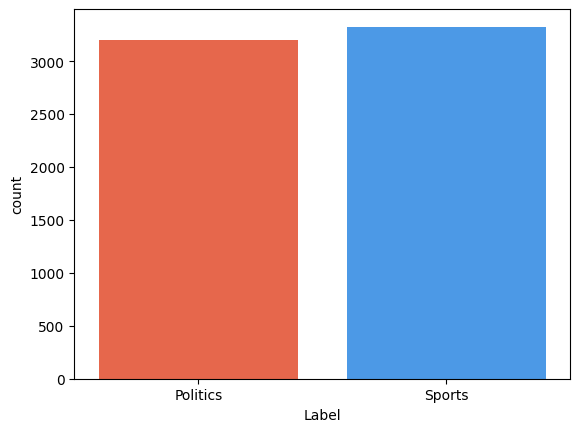

In [22]:
sns.countplot(x="Label",data =train, palette=["#FF5733", "#3399FF", "#33FF7A"])

### have idea about the frequency of words in each label

In [23]:
from collections import Counter
def word_count(data):
    freqs = {}
    for i in range(data.shape[0]) :
        label = data['Label'][i]
        for word in  data['TweetText'][i]:
            pair = ((word,label))
            if pair in freqs :
                freqs[pair] += 1
            else :
                freqs[pair] = 1
    return freqs

word_count(train)

{('seckerry', 'Politics'): 51,
 ('value', 'Politics'): 8,
 ('measured', 'Politics'): 2,
 ('dollar', 'Politics'): 9,
 ('in', 'Politics'): 122,
 ('term', 'Politics'): 19,
 ('of', 'Politics'): 216,
 ('deepest', 'Politics'): 2,
 ('american', 'Politics'): 65,
 ('1481', 'Politics'): 4,
 ('fear', 'Politics'): 6,
 ('watch', 'Sports'): 79,
 ('video', 'Sports'): 27,
 ('highlight', 'Sports'): 24,
 ('wwc13', 'Sports'): 30,
 ('final', 'Sports'): 155,
 ('australia', 'Sports'): 104,
 ('west', 'Sports'): 25,
 ('indie', 'Sports'): 16,
 ('nitro', 'Sports'): 2,
 ('circus', 'Sports'): 2,
 ('at', 'Sports'): 25,
 ('albertpark', 'Sports'): 8,
 ('theymakeitlooksoeasy', 'Sports'): 1,
 ('cantwaitforausgp', 'Sports'): 29,
 ('always', 'Sports'): 14,
 ('good', 'Sports'): 84,
 ('thing', 'Sports'): 20,
 ('thanks', 'Sports'): 107,
 ('feedback', 'Sports'): 27,
 ('dr', 'Politics'): 27,
 ('rajan', 'Politics'): 11,
 ('fiscal', 'Politics'): 19,
 ('consolidation', 'Politics'): 4,
 ('create', 'Politics'): 28,
 ('space', 'Po

In [24]:
df=pd.DataFrame.from_dict(word_count(train), orient='index', columns=['count'])
#create the two columns word , label
df.reset_index(inplace=True)
df[['word','label']] = pd.DataFrame(df['index'].tolist(), index=df.index)
df.drop(columns=['index'], inplace=True)

In [25]:
#sort by count
df.sort_values(by=['count'], ascending=False, inplace=True)

In [26]:
#reindex
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df.head()

,count,word,label
0,348,president,Politics
1,347,indvaus,Sports
2,331,test,Sports
3,259,run,Sports
4,253,to,Politics


In [27]:
#create the weight for a word in the whole of the dataset grouped by label
df['weights']=df['count']/df.groupby('label')['count'].transform('sum')
df.head()

,count,word,label,weights
0,348,president,Politics,0.010492
1,347,indvaus,Sports,0.010096
2,331,test,Sports,0.009630
3,259,run,Sports,0.007536
4,253,to,Politics,0.007628


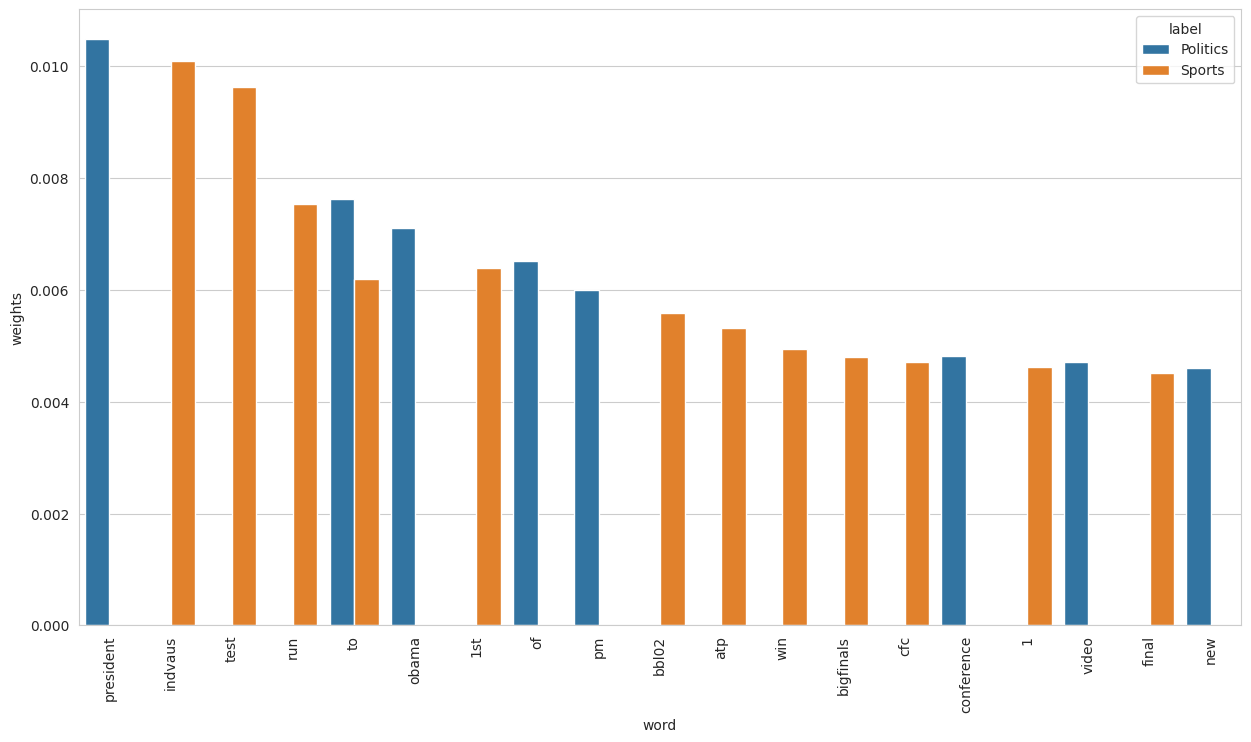

In [28]:
#plot of weith of each word
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
sns.barplot(x='word', y='weights', hue='label', data=df.head(20))
plt.xticks(rotation=90)
plt.show()

# Text Vectorization

## TF-IDF

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# Convert list elements to strings and then apply TF-IDF vectorizer
tfidfconverter = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7)
X = tfidfconverter.fit_transform(train['TweetText'].apply(' '.join))
y = train['Label']

## first model : Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
classifier = LogisticRegression()

# Train the classifier
classifier.fit(X, y)

LogisticRegression()

In [32]:
from sklearn.metrics import accuracy_score
y_train_pred = classifier.predict(X)
# Calculate training accuracy
training_accuracy = accuracy_score(y, y_train_pred)
print(training_accuracy)

0.9419157088122605


## confusion matrix for Logistic Regression

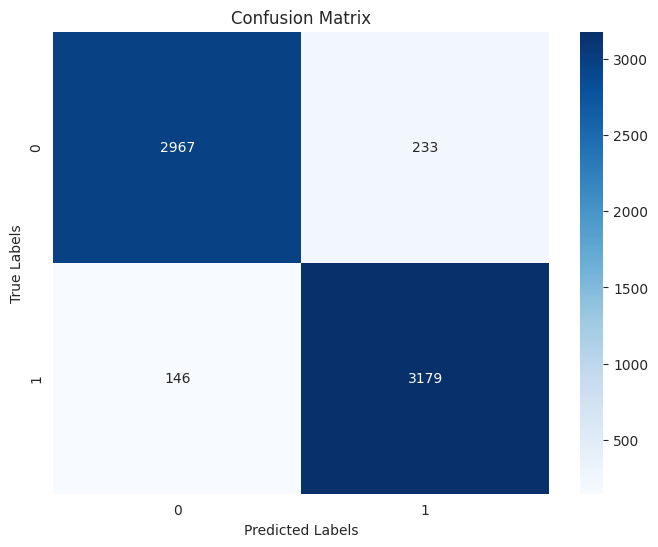

In [33]:
from sklearn.metrics import confusion_matrix
y_train_pred = classifier.predict(X)
confusion = confusion_matrix(y, y_train_pred)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## second model : XGBOOST

In [34]:
import xgboost as xgb

In [35]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the Label column
train['Label_Encoded'] = label_encoder.fit_transform(train['Label'])

# Map Sports to 0 and Politics to 1
train['Label_Encoded'] = train['Label_Encoded'].map({0: 0, 1: 1})
y=train['Label_Encoded']
# Train XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X, y)







# Predict on the training data
y_train_pred_xgb = xgb_classifier.predict(X)

# Calculate training accuracy
training_accuracy_xgb = accuracy_score(y, y_train_pred_xgb)
print("XGBoost Training Accuracy:", training_accuracy_xgb)


XGBoost Training Accuracy: 0.9276628352490421


## confusion matrix for XGBOOST

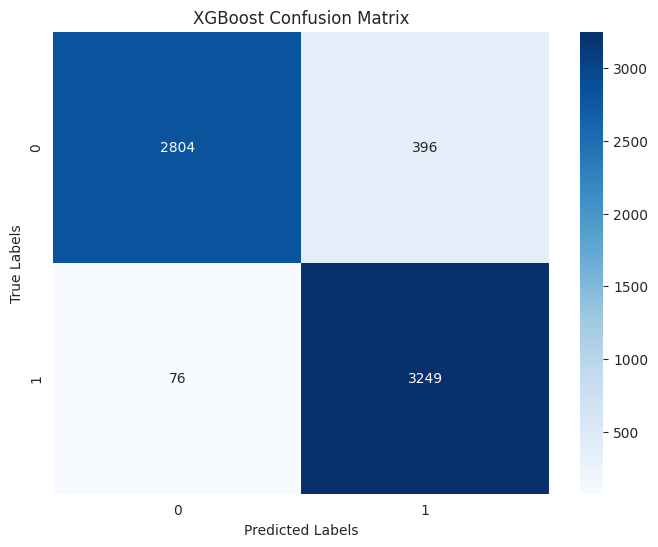

In [36]:
y_train_pred_xgb = xgb_classifier.predict(X)
confusion_xgb = confusion_matrix(y, y_train_pred_xgb)

# plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()